In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as lm

In [2]:
#read the customer data 

In [3]:
data = pd.read_csv("Ecommerce Customers.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
data.shape

(500, 8)

In [6]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
len(data.Avatar.unique()), data.Avatar.unique()

(138,
 array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
        'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
        'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
        'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
        'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
        'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
        'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
        'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
        'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
        'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
        'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
        'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
        'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
        'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
        'DarkKhaki', 'Fir

In [9]:
#EDA

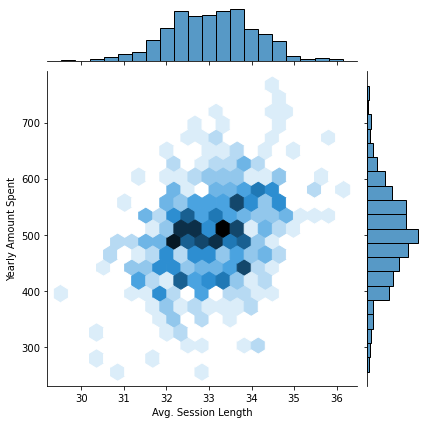

In [10]:
#analyse univariate and bivariate
sns.jointplot(x='Avg. Session Length',y ='Yearly Amount Spent', data = data,  kind = "hex")

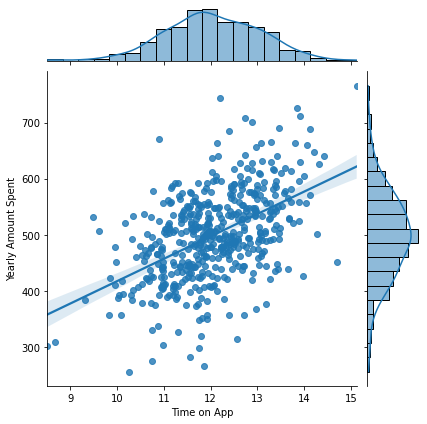

In [11]:
#Create jointplot to compare the Time on App column
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = data, kind = "reg")

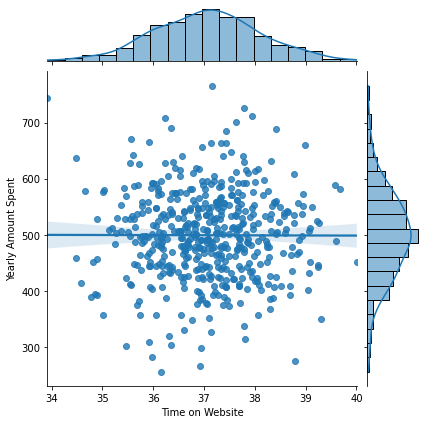

In [12]:
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = data, kind = "reg")

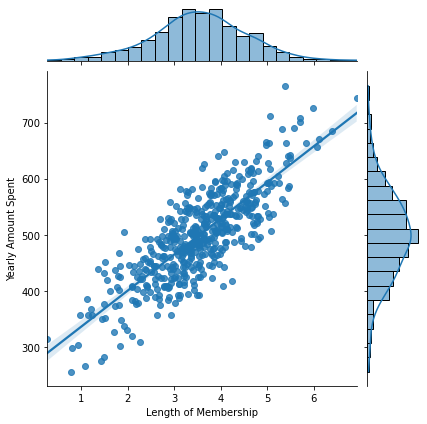

In [13]:
sns.jointplot(x='Length of Membership',y ='Yearly Amount Spent', data = data, kind = "reg")

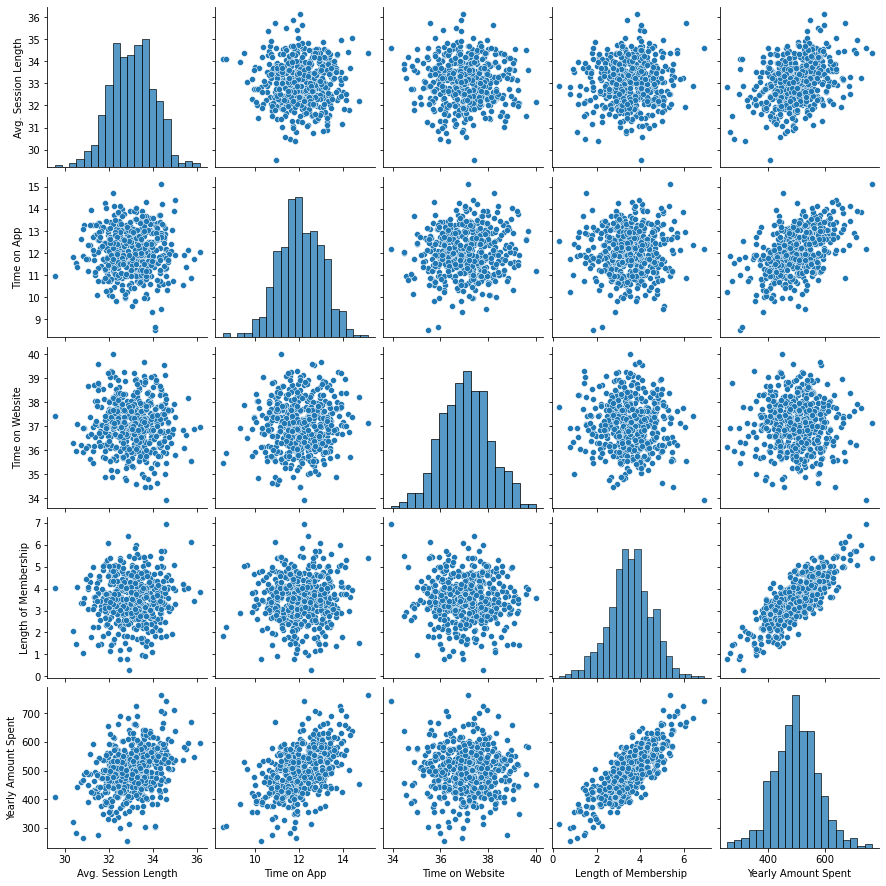

In [14]:
#correaltion between bivariate 
sns.pairplot(data)

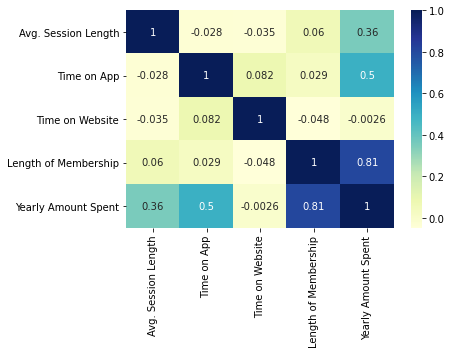

In [15]:
#heatmap correlation
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [16]:
#split the data 

In [17]:
X =  data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 4), (150, 4), (350,), (150,))

In [19]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [20]:
X_train.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,350.000000,350.000000,350.000000,350.000000
mean,33.060210,12.048784,36.995015,3.575777
std,0.991460,1.005223,1.021934,1.028690
min,29.532429,8.508152,33.913847,0.269901
25%,32.323891,11.381137,36.268705,2.965783
50%,33.113712,12.039155,37.030715,3.589728
75%,33.707393,12.728767,37.670184,4.192497
max,35.860237,15.126994,39.672591,6.922689


In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as lm


def custom_metrics(y_test,y_pred):
    import sklearn.metrics as metrics
    
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('r2_score: {}'.format(r2_score(y_test, y_pred)),'\n')

    plt.scatter(y_test,y_pred)
    plt.xlabel('Predicted Value')
    plt.ylabel('Y - Test')
    plt.show()

This are the metrics for simple linear model
MAE: 8.426091641432082
MSE: 103.91554136503304
RMSE: 10.19389726086314
r2_score: 0.9808757641125856 



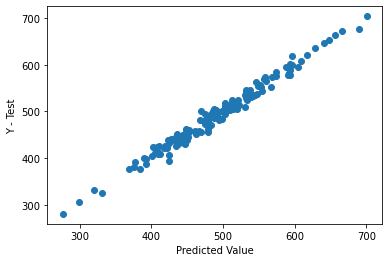

In [22]:
def simple_lm(X_train,X_test,y_train,y_test):
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
    import sklearn.linear_model as lm

    regressor = lm.LinearRegression() 

    regressor.fit(X_train, y_train)               # training the data on linear reg 
    y_pred = regressor.predict(X_test)            # predicting on test data set

    #print(y_pred)
    #print(np.array(y_test))
    print('This are the metrics for simple linear model')
    
    custom_metrics(y_test,y_pred)
    

simple_lm(X_train,X_test,y_train,y_test)


This are the metrics for Lasso linear model
MAE: 8.426056707875047
MSE: 103.91548825379981
RMSE: 10.193894655812361
r2_score: 0.9808757738869825 



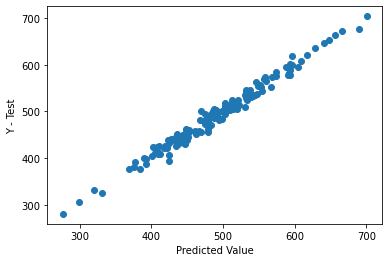

Followings are the best parameters =  {'alpha': 0.001}


In [23]:
def lm_lasso(X_train,X_test,y_train,y_test):
    # https://scikit-learn.org/stable/modules/linear_model.html#lasso
    reg2 = lm.Lasso()

    c=np.linspace(0.001,1,10)
    #print(c,'parameters for alpha')
    parameters = {'alpha':c}

    clf = GridSearchCV(reg2, parameters)
    clf.fit(X_train,y_train)

    y_p1=clf.predict(X_test)

    print('This are the metrics for Lasso linear model')
    custom_metrics(y_test,y_p1)

    print('Followings are the best parameters = ',clf.best_params_)

    # features importance bar plot
    final_model = lm.Ridge(alpha=clf.best_params_['alpha'])
    final_model.fit(X_train,y_train)
lm_lasso(X_train,X_test,y_train,y_test)

This are the metrics for Ridge linear model
MAE: 8.42534499755147
MSE: 103.91769153101856
RMSE: 10.194002723710572
r2_score: 0.9808753684039075 



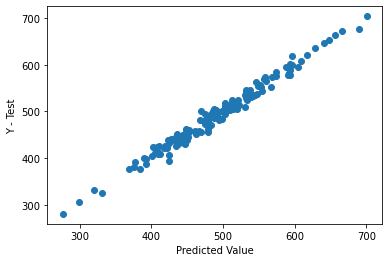

Followings are the best parameters =  {'alpha': 0.334}


In [24]:
def lm_ridge(X_train,X_test,y_train,y_test):
    # https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification
    reg3 = lm.Ridge()

    c=np.linspace(0.001,1,10)
    #print(c,'parameters for alpha')
    parameters = {'alpha':c}

    clf1 = GridSearchCV(reg3, parameters)
    clf1.fit(X_train,y_train)

    y_p2=clf1.predict(X_test)
    print('This are the metrics for Ridge linear model')
    custom_metrics(y_test,y_p2)

    print('Followings are the best parameters = ',clf1.best_params_)

    # features importance bar plot
    final_model = lm.Ridge(alpha=clf1.best_params_['alpha'])
    final_model.fit(X_train,y_train)

lm_ridge(X_train,X_test,y_train,y_test)

This are the metrics for elasticNet linear model
MAE: 8.425735675967074
MSE: 103.91548945545132
RMSE: 10.193894714752126
r2_score: 0.980875773665835 



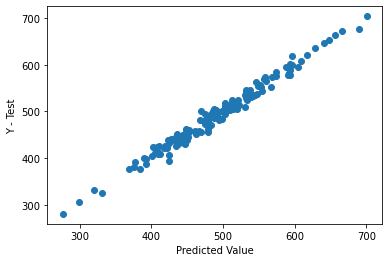

Followings are the best parameters =  {'alpha': 0.001, 'l1_ratio': 0.5700000000000001}


In [25]:
def lm_elastic(X_train,X_test,y_train,y_test):
    # https://machinelearningmastery.com/elastic-net-regression-in-python/

    from sklearn.model_selection import RepeatedKFold
    reg4 = lm.ElasticNet()

    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    grid = dict()
    grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
    grid['l1_ratio'] = np.arange(0, 1, 0.01)

    clf = GridSearchCV(reg4, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)


    clf.fit(X_train,y_train)
    f = clf.predict(X_test)
    print('This are the metrics for elasticNet linear model')
    custom_metrics(y_test,f)

    print('Followings are the best parameters = ',clf.best_params_)

    # features importance bar plot
    final_model = lm.ElasticNet(alpha=clf.best_params_['alpha'],l1_ratio=clf.best_params_['l1_ratio'])
    final_model.fit(X_train,y_train)    

lm_elastic(X_train,X_test,y_train,y_test)